In [46]:
# Read uspto dataset
import pandas as pd
import numpy as np
import nltk


df = pd.read_csv('./dataset/AbstractDataset/df-Abstract.csv')
df = df.rename(columns={'No': 'ID', 'Title': 'Title', 'Abstract': 'Abstract', 'Subclass_labels': 'cpc_subclass'})
df_Abstract=df[["ID","Title","Abstract","cpc_subclass"]]
df_Abstract= df_Abstract.dropna()
df_Abstract = df_Abstract.reset_index(drop=True)
df_Abstract.head()

,ID,Title,Abstract,cpc_subclass
0,US07072141,magnetic disc unit with range of gap between d...,a magnetic disc unit having a rotating disc ty...,['G11B']
1,US06981282,systems and methods for transformable suits,methods and systems for transforming a volume ...,['A41D']
2,US06981283,gardening gloves with cushion insert to protec...,a gardening glove or the like designed to prev...,['A41D']
3,US06981284,hockey helmet comprising a lateral adjustment ...,a hockey helmet for receiving a head of a wear...,['A63B']
4,US06981285,toilet and method of operation,a toilet and toilet system suitable for a boat...,['E03D']


In [47]:
df_Abstract_uspto = df_Abstract[df_Abstract['cpc_subclass'].str.contains(r'\bH[\w]*|,[\s]*H[\w]*')]
df_Abstract_uspto

,ID,Title,Abstract,cpc_subclass
19,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L']
20,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']"
57,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S']
58,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K']
59,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K']
...,...,...,...,...
2000104,US08975581,ion trap,an ion trap comprising a first array of magnet...,['H01J']
2000106,US08976203,wavelength conversion device and image display...,a wavelength conversion device includes an exc...,"['G09G', 'G03B', 'H01S', 'H04N']"
2000107,US08976510,cable assembly and electronic device,an electronic device including an electronic u...,"['H05K', 'H01R']"
2000108,US08976819,circuit and method for metering electricity,a current detection module generates a first c...,"['H04J', 'G01R']"


In [48]:
df_Abstract_uspto["Abstract"]= df_Abstract_uspto["Abstract"].dropna()
df_Abstract_uspto = df_Abstract_uspto.reset_index(drop=True)
df_Abstract_uspto

,ID,Title,Abstract,cpc_subclass
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L']
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']"
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S']
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K']
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K']
...,...,...,...,...
595461,US08975581,ion trap,an ion trap comprising a first array of magnet...,['H01J']
595462,US08976203,wavelength conversion device and image display...,a wavelength conversion device includes an exc...,"['G09G', 'G03B', 'H01S', 'H04N']"
595463,US08976510,cable assembly and electronic device,an electronic device including an electronic u...,"['H05K', 'H01R']"
595464,US08976819,circuit and method for metering electricity,a current detection module generates a first c...,"['H04J', 'G01R']"


In [49]:
df_Abstract_uspto=df_Abstract_uspto[:60000]
df_Abstract_uspto

,ID,Title,Abstract,cpc_subclass
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L']
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']"
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S']
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K']
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K']
...,...,...,...,...
59995,US07294937,apparatus and method for manufacturing a semic...,a multi layered semiconductor structure with f...,['H01L']
59996,US07262721,methods of and apparatuses for adaptive entrop...,methods and apparatuses are provided for adapt...,['H03M']
59997,US07260826,resource allocation in multi stream ip network...,a resource allocation of multiple compressed a...,['H04N']
59998,US07231525,authentification of data in a digital transmis...,a method of authentification of data sent in a...,"['G06F', 'H04L']"


# preprocessing

In [50]:
def cleantext(df_Abstract_uspto): 
    
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['Abstract'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # convert to lowercase
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].str.lower()
    
    #remove numbers
    df_Abstract_uspto['cleaned_Abstract_text'] =df_Abstract_uspto['cleaned_Abstract_text'].replace(r'\d+', '', regex = True)
        
    #remove_symbols
    df_Abstract_uspto['cleaned_Abstract_text']  = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    #remove punctuations 
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    #remove_URL(x):
    df_Abstract_uspto['cleaned_Abstract_text']  = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'https.*$', "", regex = True)
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace("   ", " ", regex = True)
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace("  ", " ", regex = True)
   
    return df_Abstract_uspto

df_Abstract_uspto = cleantext(df_Abstract_uspto)
df_Abstract_uspto.head()

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...


In [51]:
import nltk
from nltk.corpus import stopwords

# Load the stop words
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))

# Define a set of patent-specific stop words
patent_stop_words = set(["invention", "apparatus", "method", "system", "device",
                         "means", "comprising", "having", "including", "wherein",
                         "according", "configured", "configured to", "configured for",
                         "one or more", "plurality", "at least", "said", "and/or",
                         "thereof", "thereto", "herein", "hereby", "hereof", "hereunder",
                         "hereto", "herewith", "respectively", "corresponding",
                         "respectively corresponding", "substantially", "generally",
                         "typically", "usually", "often", "frequently", "commonly",
                         "normally", "conventional", "traditional", "known", "prior",
                         "art", "field", "related", "disclosed", "described", "illustrated",
                         "embodiment", "example", "figure", "graph", "chart", "data",
                         "information", "section", "portion", "aspect", "aspect of",
                         "part", "feature", "detail", "particular", "certain", "some",
                         "many", "various", "multiple", "different", "differentiate",
                         "similar", "corresponding", "correspondingly", "also",
                         "in addition", "furthermore", "moreover", "additionally",
                         "especially", "particular", "particularity", "specific",
                         "specifically", "example", "exemplary", "illustrative",
                         "such as", "include", "includes", "including", "included",
                         "contain", "contains", "containing", "contained", "shown"])

# Merge the sets of stop words
stop_words = english_stop_words.union(patent_stop_words)

df_Abstract_uspto['cleaned_Abstract_text_without_Stopwprd'] = df_Abstract_uspto['cleaned_Abstract_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
df_Abstract_uspto.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...


In [52]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df_Abstract_uspto["Lemmatized-Abstract"] = df_Abstract_uspto["cleaned_Abstract_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))
df_Abstract_uspto.head()

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...


# divide the dataset

In [53]:
#Divide the dataset into different size
df_Abstract_50K=df_Abstract_uspto[:50000]
df_Abstract_50K

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...
...,...,...,...,...,...,...,...
49995,US07180993,associating call appearance with data associat...,a distributed telephone answering system has i...,['H04M'],a distributed telephone answering system has i...,distributed telephone answering intelligence d...,distributed telephone answering intelligence d...
49996,US07262479,layout structure of fuse bank of semiconductor...,a fuse bank of a semiconductor memory device i...,['H01L'],a fuse bank of a semiconductor memory device i...,fuse bank semiconductor memory provided fuse b...,fuse bank semiconductor memory provided fuse b...
49997,US07279979,method and arrangement for adjusting an output...,the invention relates to power amplifiers havi...,['H03G'],the invention relates to power amplifiers havi...,relates power amplifiers adjustable output imp...,relates power amplifier adjustable output impe...
49998,US07224052,ic card with controller and memory chips,an ic card capable of reinforcing the preventi...,"['H01L', 'G06K']",an ic card capable of reinforcing the preventi...,ic card capable reinforcing prevention electro...,ic card capable reinforcing prevention electro...


In [54]:
New_Sample = df_Abstract_uspto.iloc[59394:59395, :]
New_Sample

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract
59394,US07187658,data transmission apparatus selecting efficien...,a data transmission apparatus is provided for ...,"['G06F', 'H04L']",a data transmission apparatus is provided for ...,transmission provided transmitting received us...,transmission provided transmitting received us...


In [55]:
new_Abstract = str(New_Sample["Lemmatized-Abstract"].iloc[0])
new_Abstract

'transmission provided transmitting received user terminal network destination user terminal executing communication using internet protocol transmission routing table storing relating destination address address network table storing static dynamic network selection unit selecting one network transmission transmits destination based static dynamic transmission enables transmission appropriate network selecting appropriate network based static dynamic network'

In [56]:
new_Abstract = str(New_Sample["Abstract"].iloc[0])
new_Abstract

'a data transmission apparatus is provided for transmitting data received from a user terminal device through a plurality of networks to a destination the user terminal device executing communication using an internet protocol the data transmission apparatus includes a routing table storing information relating a destination address of the data and addresses of the plurality of networks an information table storing static and dynamic information about the plurality of networks and a selection unit selecting one or the plurality of networks through which the data transmission apparatus transmits the data to the destination based on the static and dynamic information the data transmission apparatus enables data transmission through the appropriate network by selecting the appropriate network based on the static and dynamic information about the plurality of networks'

# Bertopic for 50k patent

In [101]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')
#sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=80, 
                  n_components=15, 
                  min_dist=0.1, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=30, 
                        min_samples=5, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.6)

#c-TF-IDF
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

#Run Model
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

# Run BERTopic model
topics, probabilities = topic_model.fit_transform(df_Abstract_50K['Lemmatized-Abstract']) 

Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

2023-03-18 14:34:25,754 - BERTopic - Transformed documents to Embeddings
2023-03-18 14:36:28,199 - BERTopic - Reduced dimensionality
2023-03-18 14:36:34,108 - BERTopic - Clustered reduced embeddings


In [102]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_Abstract_50K['Lemmatized-Abstract'],
                          "ID": range(len(df_Abstract_50K['Lemmatized-Abstract'])),
                          "Topic": topics})

documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] for topic in range(len(set(topics))-1)]


# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_npmi')
coherence_c_nmpi = coherence_model.get_coherence()
print("c_npmi is: ",coherence_c_nmpi)

c_npmi is:  -0.0036112864269236683


In [103]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_Abstract_50K['Lemmatized-Abstract'],
                          "ID": range(len(df_Abstract_50K['Lemmatized-Abstract'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.4932792610265977


In [104]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_Abstract_50K['Lemmatized-Abstract'],
                          "ID": range(len(df_Abstract_50K['Lemmatized-Abstract'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='u_mass')
coherence_u_mass= coherence_model.get_coherence()
print("u_mass is: ", coherence_u_mass)

u_mass is:  -0.9042370795850639


In [105]:
 topic_model.get_topic_info()

,Topic,Count,Name
0,-1,36169,-1_wireless_radio_wafer_receiver
1,0,784,0_floating_memory_non volatile_volatile
2,1,724,1_call_telephone_party_called
3,2,466,2_motion_picture_vector_video
4,3,368,3_heat_cooling_sink_fin
...,...,...,...
133,132,31,132_ignition_coil_secondary_primary
134,133,31,133_sound_audio signal_audio_left right
135,134,31,134_plasma_chamber_batch_gas
136,135,30,135_antenna_vehicle_rotatable_base body


In [106]:
df_Abstract_50K['Bertopic_topics'] = topics
df_Abstract_50K['Bertopic_prob'] = probabilities
#search_topics=df_claim_20K[df_claim_20K['predicted_topic'] == 71]
#search_topics = search_topics.sort_values('predicted_topic_prob', ascending=False)
#search_topics = df_claim_20K.reset_index().rename(columns={'index': 'new_index'})
df_Abstract_50K_topic=df_Abstract_50K[["ID","Title","Abstract", "Lemmatized-Abstract","Bertopic_topics","Bertopic_prob"]]
df_Abstract_50K_topic

,ID,Title,Abstract,Lemmatized-Abstract,Bertopic_topics,Bertopic_prob
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bump formed ele...,-1,0.000000
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,-1,0.000000
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,-1,0.000000
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,-1,0.000000
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,-1,0.000000
...,...,...,...,...,...,...
49995,US07180993,associating call appearance with data associat...,a distributed telephone answering system has i...,distributed telephone answering intelligence d...,1,0.795858
49996,US07262479,layout structure of fuse bank of semiconductor...,a fuse bank of a semiconductor memory device i...,fuse bank semiconductor memory provided fuse b...,0,0.793759
49997,US07279979,method and arrangement for adjusting an output...,the invention relates to power amplifiers havi...,relates power amplifier adjustable output impe...,13,0.929689
49998,US07224052,ic card with controller and memory chips,an ic card capable of reinforcing the preventi...,ic card capable reinforcing prevention electro...,-1,0.000000


In [107]:
# Find topics
num_of_topics = 3
similar_topics, similarity = topic_model.find_topics(new_Abstract, top_n=num_of_topics); 

# Print results
print(f'The top {num_of_topics} similar topics are {similar_topics}, and the similarities are {np.round(similarity,2)}')

for idx, topic_idx in enumerate(similar_topics):
    topic = topic_model.get_topic(topic_idx)
    keywords = ' '.join(str(keyword) for keyword in topic[0])
    print(f"Topic {idx+1}: {keywords}")

The top 3 similar topics are [-1, 93, 130], and the similarities are [0.44 0.43 0.4 ]
Topic 1: wireless 0.0768041511751461
Topic 2: access point 0.5641794848593048
Topic 3: base station 0.47944574139012086


In [109]:
topic1 = topic_model.get_topic(93)
topic1

[('access point', 0.5641794848593048),
 ('wireless communication', 0.4071674687756719),
 ('wireless', 0.3912367957417379),
 ('wireless network', 0.3395548839980225),
 ('access', 0.2980026014124907),
 ('communication path', 0.2843701210441582),
 ('lower level', 0.2842799896237123),
 ('lan', 0.27839907046680124),
 ('computing', 0.2689164999416806),
 ('second base', 0.2619707465579026)]

In [110]:
filter_topics_Bertopic=df_Abstract_50K_topic[df_Abstract_50K_topic['Bertopic_topics'] == 93]
filter_topics_Bertopic = filter_topics_Bertopic.sort_values('Bertopic_prob', ascending=False)
filter_topics_Bertopic = filter_topics_Bertopic.reset_index().rename(columns={'index': 'new_index'})
filter_topics_Bertopic

,new_index,ID,Title,Abstract,Lemmatized-Abstract,Bertopic_topics,Bertopic_prob
0,1651,US06983141,communication apparatus and communication method,a communication apparatus which is in a wirele...,communication wireless network characterized c...,93,1.000000
1,41332,US07130289,detecting a hidden node in a wireless local ar...,a method and system for detecting a hidden nod...,detecting hidden node wireless local area netw...,93,1.000000
2,40380,US07126937,methods and systems for clock synchronization ...,a wireless local access network includes a hie...,wireless local access network hierarchy access...,93,1.000000
3,39659,US07123915,wireless communication system for an enterprise,an enterprise communication system comprises a...,enterprise communication comprises wireless tr...,93,1.000000
4,38694,US07120456,wireless terminals with multiple transceivers,a wireless network includes a number of first ...,wireless network number first wireless termina...,93,1.000000
5,42387,US07133526,system and method for providing wlan security ...,a system and method are disclosed that overcom...,overcome deficiency ieee wep key management sc...,93,1.000000
6,37715,US07116993,system and method for providing location based...,a method and system for providing information ...,providing one several machine wireless interfa...,93,1.000000
7,42457,US07133681,method and system of pooling channel elements ...,managing channel element licenses for base tra...,managing channel element license base transcei...,93,1.000000
8,44130,US07139577,method for call control of communication termi...,calls ar directed to wireless communication te...,call ar directed wireless communication termin...,93,1.000000
9,34884,US07107052,local area network having multiple channel wir...,a communication network having at least one ac...,communication network least one access point s...,93,1.000000


In [111]:
#caculate the similarity between docs and new Abstract

In [112]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Load the pre-trained model
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

# Encode the documents in the dataset
document_embeddings = sbert_model.encode(filter_topics_Bertopic['Lemmatized-Abstract'])

# Encode the new sample
document_embeddings = np.vstack(document_embeddings)
new_sample_embedding = sbert_model.encode([new_Abstract])

# Compute cosine similarity scores
cos_similarities = cosine_similarity(document_embeddings, new_sample_embedding)
filter_topics_Bertopic['cosine_similarity_BERTopic'] = cos_similarities.flatten()


# Compute euclidean distances
#euc_distances = euclidean_distances(document_embeddings, new_sample_embedding)
#search_topics['euclidean_distance'] = euc_distances.flatten()

# Sort by cosine similarity and display the top results
#search_topics.sort_values('cosine_similarity_BERTopic', ascending=False, inplace=True)

In [113]:
filter_topics_Bertopic

,new_index,ID,Title,Abstract,Lemmatized-Abstract,Bertopic_topics,Bertopic_prob,cosine_similarity_BERTopic
0,1651,US06983141,communication apparatus and communication method,a communication apparatus which is in a wirele...,communication wireless network characterized c...,93,1.000000,0.738217
1,41332,US07130289,detecting a hidden node in a wireless local ar...,a method and system for detecting a hidden nod...,detecting hidden node wireless local area netw...,93,1.000000,0.658470
2,40380,US07126937,methods and systems for clock synchronization ...,a wireless local access network includes a hie...,wireless local access network hierarchy access...,93,1.000000,0.633839
3,39659,US07123915,wireless communication system for an enterprise,an enterprise communication system comprises a...,enterprise communication comprises wireless tr...,93,1.000000,0.712140
4,38694,US07120456,wireless terminals with multiple transceivers,a wireless network includes a number of first ...,wireless network number first wireless termina...,93,1.000000,0.605769
5,42387,US07133526,system and method for providing wlan security ...,a system and method are disclosed that overcom...,overcome deficiency ieee wep key management sc...,93,1.000000,0.547495
6,37715,US07116993,system and method for providing location based...,a method and system for providing information ...,providing one several machine wireless interfa...,93,1.000000,0.620651
7,42457,US07133681,method and system of pooling channel elements ...,managing channel element licenses for base tra...,managing channel element license base transcei...,93,1.000000,0.571526
8,44130,US07139577,method for call control of communication termi...,calls ar directed to wireless communication te...,call ar directed wireless communication termin...,93,1.000000,0.545046
9,34884,US07107052,local area network having multiple channel wir...,a communication network having at least one ac...,communication network least one access point s...,93,1.000000,0.625529


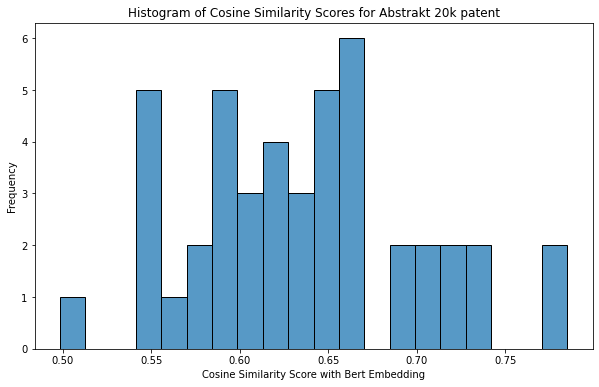

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the cosine similarity scores from the dataframe
cosine_scores = filter_topics_Bertopic['cosine_similarity_BERTopic']

# Plot a histogram of the cosine similarity scores
plt.figure(figsize=(10,6))
sns.histplot(cosine_scores, bins=20)
plt.title('Histogram of Cosine Similarity Scores for Abstrakt 20k patent')
plt.xlabel('Cosine Similarity Score with Bert Embedding')
plt.ylabel('Frequency')
plt.show()

In [115]:
#get the most similar doc in dataset to query

In [116]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_Bertopic = filter_topics_Bertopic.sort_values(by=['cosine_similarity_BERTopic'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_Bertopic.iloc[0]['Abstract']

most_similar_doc

'a wireless communication system includes a radio node controller in an ss7 network that generates ss7 formatted information for transport in an asynchronous transfer mode permanent virtual circuit in response to communications with a mobile unit a signaling gateway receives the ss7 formatted information on the asynchronous transfer mode permanent virtual circuit the signaling gateway translates the ss7 formatted information into internet protocol information and maps the asynchronous transfer mode permanent virtual circuit to stream control transmission protocol endpoint and stream a mobile switching center in an internet protocol network receives the internet protocol formatted information on the stream control transmission protocol stream and performs further processing thereof by associating asynchronous transfer mode permanent virtual circuits with stream control transmission protocol endpoints and streams the signaling gateway need not maintain connection states in order to allow

In [117]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_Bertopic = filter_topics_Bertopic.sort_values(by=['cosine_similarity_BERTopic'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_Bertopic.iloc[0]['Lemmatized-Abstract']

most_similar_doc

'wireless communication radio node controller s network generates s formatted transport asynchronous transfer mode permanent virtual circuit response communication mobile unit signaling gateway receives s formatted asynchronous transfer mode permanent virtual circuit signaling gateway translates s formatted internet protocol map asynchronous transfer mode permanent virtual circuit stream control transmission protocol endpoint stream mobile switching center internet protocol network receives internet protocol formatted stream control transmission protocol stream performs processing associating asynchronous transfer mode permanent virtual circuit stream control transmission protocol endpoint stream signaling gateway need maintain connection state order allow back signaling gateway continue passing radio node controller mobile switching center event failure signaling gateway'

In [118]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_Bertopic = filter_topics_Bertopic.sort_values(by=['cosine_similarity_BERTopic'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_Bertopic.iloc[0]['ID']

most_similar_doc

'US07082121'